In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from datetime import datetime, date

from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

sns.set()
%matplotlib inline

In [1]:
!wget -O ./data/household_power_consumption.zip "http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
!unzip ./data/household_power_consumption.zip -d ./data/
!rm ./data/household_power_consumption.zip

--2019-03-22 09:49:25--  http://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/zip]
Saving to: ‘./data/household_power_consumption.zip’

./data/household_po 100%[===================>]  19.68M  2.39MB/s    in 16s     

2019-03-22 09:49:42 (1.25 MB/s) - ‘./data/household_power_consumption.zip’ saved [20640916/20640916]



In [208]:
data = pd.read_csv('./data/household_power_consumption.txt', sep=';', 
                   parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                   low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [169]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [5]:
# first_day = data[data.index.date == date(2009, 12, 16)]

In [6]:
# second_day = data[data.index.date == date(2009, 12, 17)]

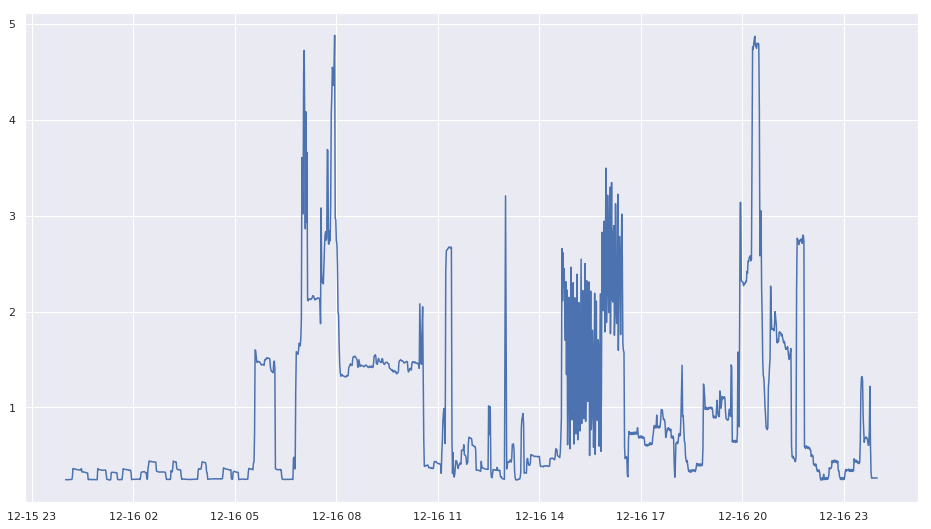

In [7]:
# plt.figure(figsize=(16,9))
# sns.lineplot(data=first_day.iloc[:, 0])

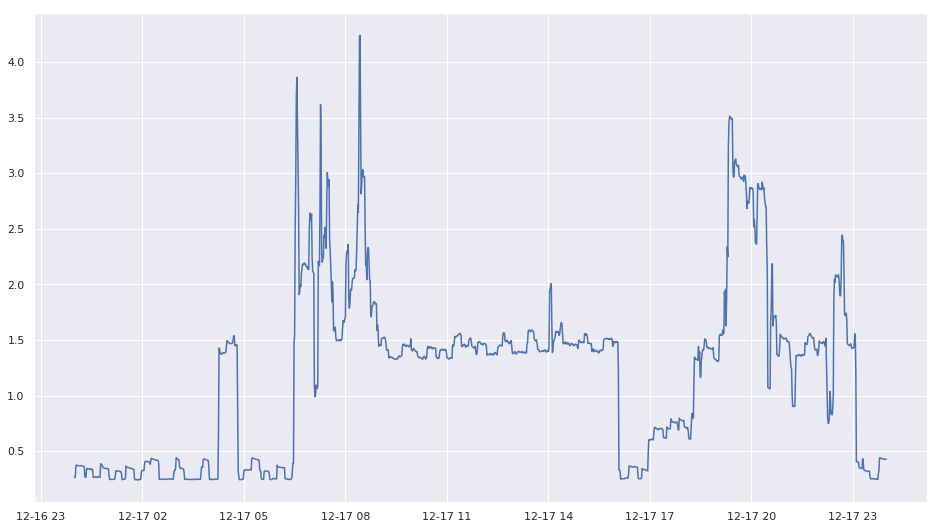

In [8]:
# plt.figure(figsize=(16,9))
# sns.lineplot(data=second_day.iloc[:, 0])

In [10]:
# for j in range(0,7):        
#         data.iloc[:,j]=data.iloc[:,j].fillna(data.iloc[:,j].mean())

## Exploratory data analysis

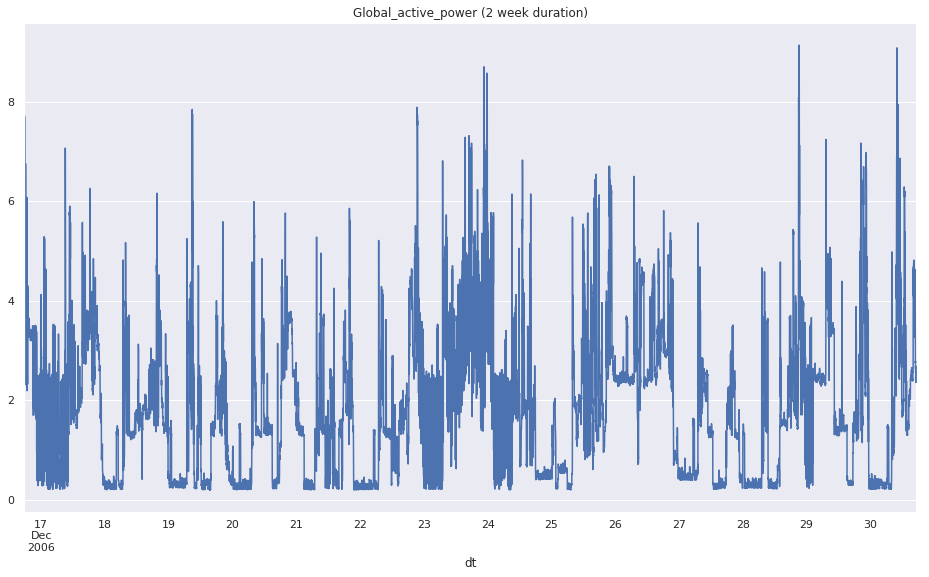

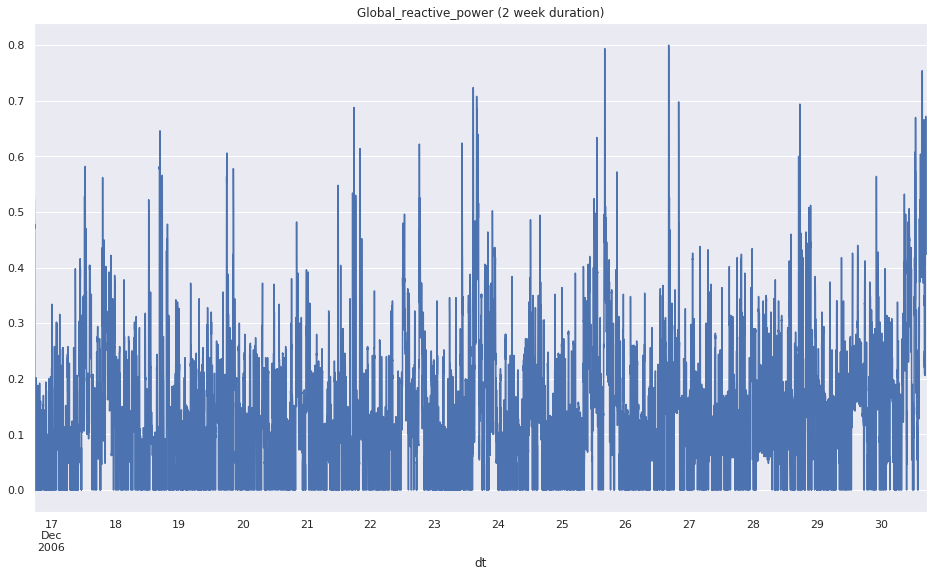

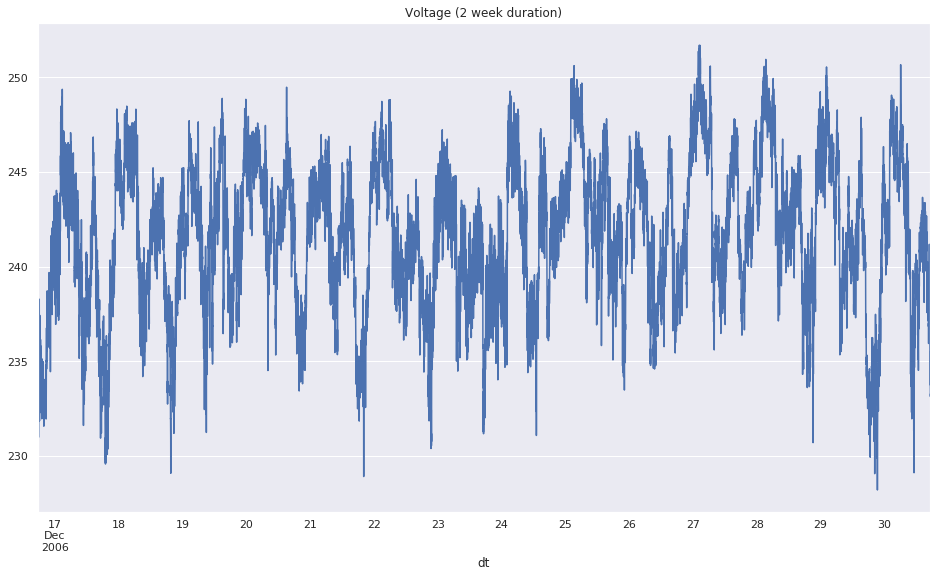

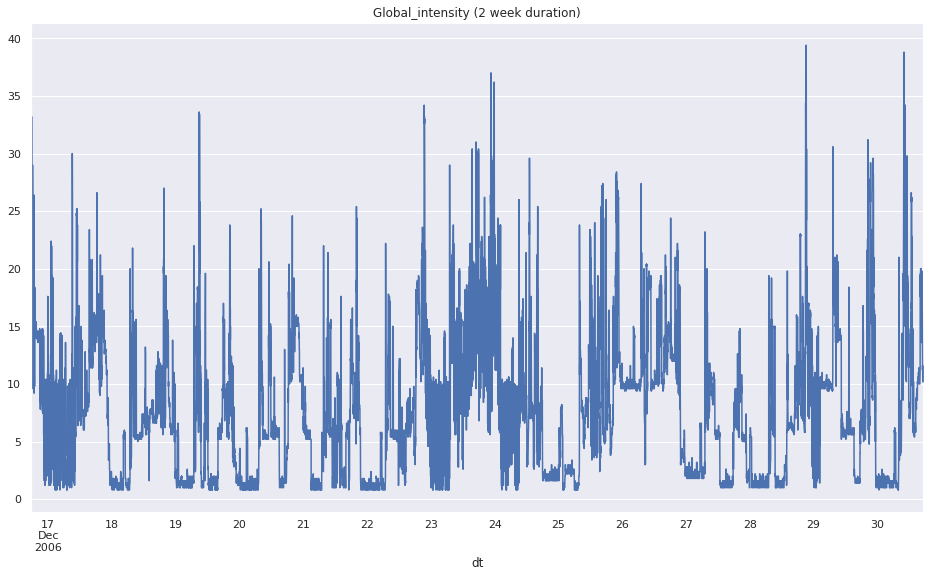

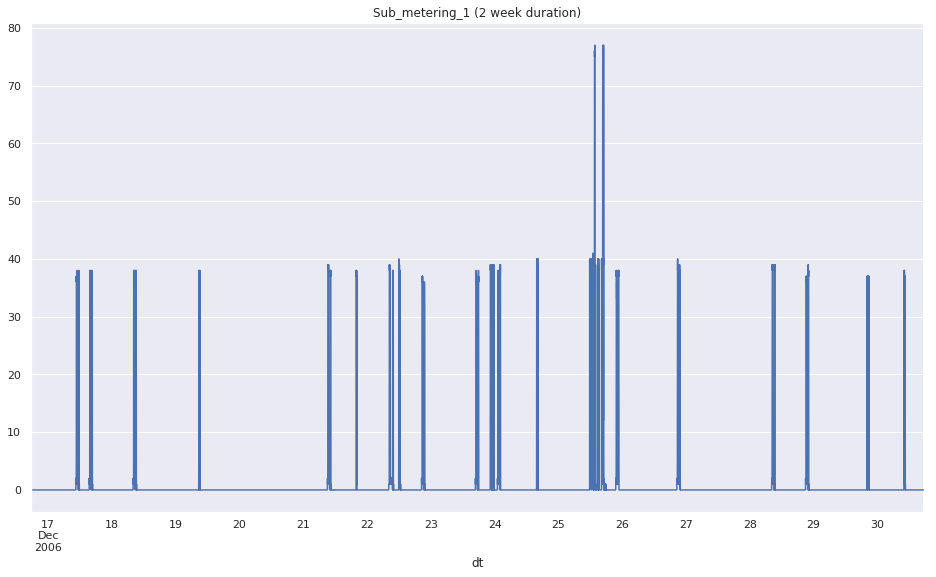

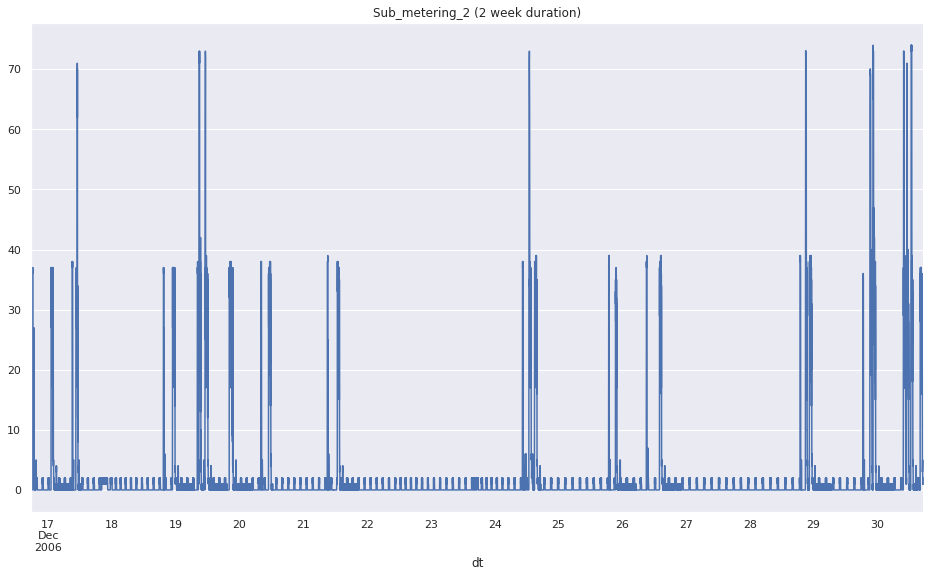

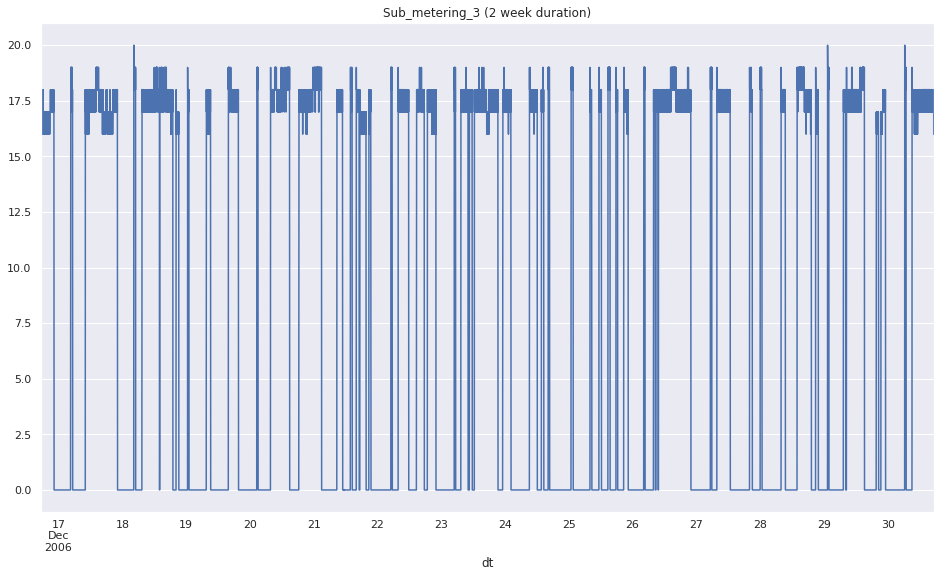

In [188]:
for column in data.columns:
    plt.figure(figsize=(16, 9))
    plt.title(f'{column} (2 week duration)')
    data[column][:60*24*14].plot()
    plt.show()

Для простоты будем работать с **дневным** потреблением электричества (*Global active power*), посмотрим внимательнее на данные.

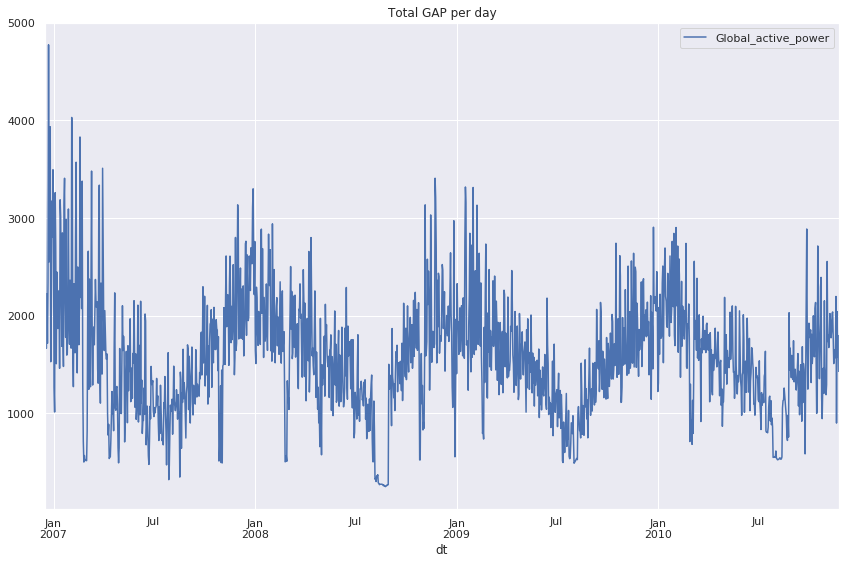

In [215]:
data[['Global_active_power']].resample('D').apply(sum).plot(title='Total GAP per day', figsize=(12, 8)) 
plt.tight_layout()
plt.show()

Видим несколько пиков в нуле. Достаточно странное поведение, учитывая что мы суммировали все возможные значения мощности за день. 

In [201]:
gap_df[gap_df['Global_active_power'] == 0]

,Global_active_power
dt,
2007-04-29,0.0
2009-06-14,0.0
2010-01-13,0.0
2010-08-18,0.0
2010-08-19,0.0
2010-08-20,0.0
2010-08-21,0.0
2010-09-26,0.0
2010-09-27,0.0


Посмотрим на изначальные данные.

In [210]:
data['Global_active_power'].isna().sum()

25979

В данных пропусков примерно на 18 дней, интерполируем пропущенные значения.

In [211]:
data['Global_active_power'].interpolate(method='linear', inplace=True)
data['Global_active_power'].isna().sum()

0

In [212]:
data['Global_active_power'].describe()

count    2.075259e+06
mean     1.090280e+00
std      1.052628e+00
min      7.600000e-02
25%      3.100000e-01
50%      6.140000e-01
75%      1.528000e+00
max      1.112200e+01
Name: Global_active_power, dtype: float64

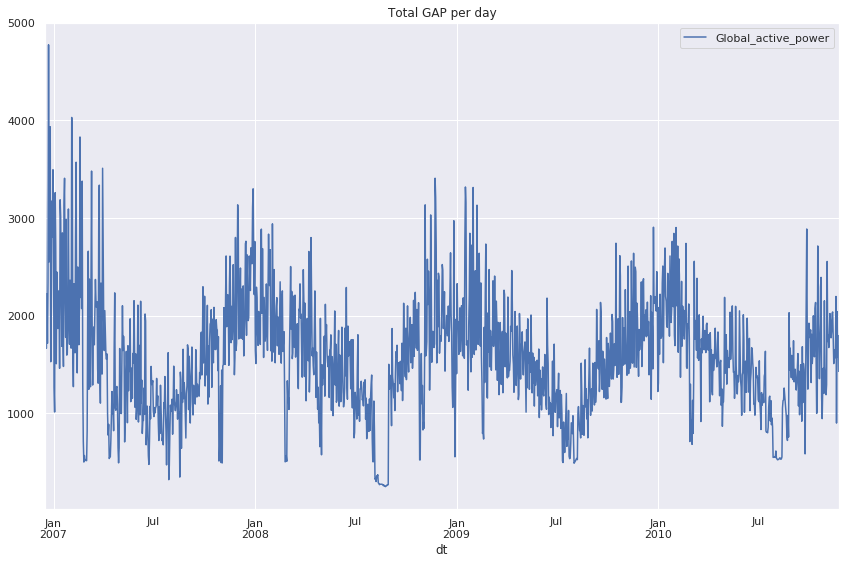

In [216]:
data[['Global_active_power']].resample('D').apply(sum).plot(title='Total GAP per day', figsize=(12, 8)) 
plt.tight_layout()
plt.show()

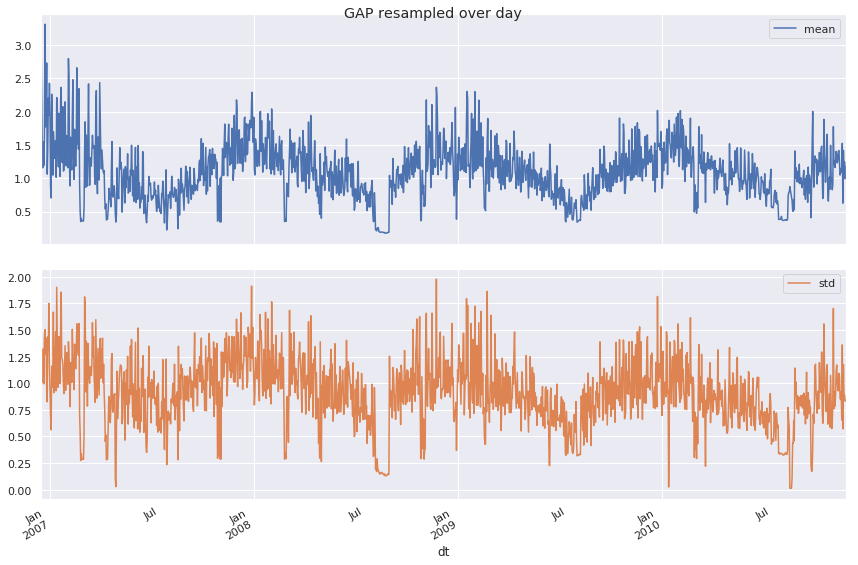

In [214]:
# r = data['Global_active_power'].resample('D').agg(['mean', 'std'])
# r.plot(subplots=True, title='GAP resampled over day', figsize=(12, 8))
# plt.tight_layout()
# plt.show()

# Fbprophet

Prophet был разработан для прогнозирования большого числа различных бизнес-показателей и строит достаточно хорошие default'ные прогнозы. Кроме того, он дает возможность, изменяя человеко-понятные параметры, улучшать прогноз и не требует от аналитиков глубоких знаний устройства предсказательных моделей.

Из минусов можно отметить достаточно небольшую точность предсказания "из коробки", для повышения качества придется повозиться с настройкой параметров. А так же странную работу (или отсутствие работы) с нестандартными периодами данных, например с часовыми тиками.

[Статья](https://research.fb.com/prophet-forecasting-at-scale/) от Facebook про Prophet.  
[Ссылка](https://facebook.github.io/prophet/docs/quick_start.html) на официальную документацию.

In [11]:
from fbprophet import Prophet

Библиотека **Prophet** имеет интерфейс похожий на *sklearn*, сначала мы создаем модель, затем вызываем у нее метод *fit* для тренировки и *predict* для предсказания. На вход методу *fit* библиотека принимает *dataframe* с двумя колонками:

**ds** — время, поле должно быть типа date или datetime,  
**y** — числовой показатель, который мы хотим предсказывать.

In [218]:
prediction_size = 31

df = data[['Global_active_power']].copy()
df = df.resample('D').apply(sum)
df.reset_index(inplace=True)
df.columns = ['ds', 'y']
df.tail()

,ds,y
1437,2010-11-22,2041.536
1438,2010-11-23,1577.536
1439,2010-11-24,1796.248
1440,2010-11-25,1431.164
1441,2010-11-26,1488.104


In [219]:
train_df = df[:-prediction_size]

In [220]:
model = Prophet(daily_seasonality=True)
model.fit(train_df)

/home/quantum/anaconda3/envs/workshop/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



Для того что бы построить предсказания методу *predict* нужно передать *dataframe* с количеством записей, равным периоду, на который нужно предсказать.

In [221]:
future_dataframe = model.make_future_dataframe(periods=prediction_size, freq='D')
future_dataframe.tail()

,ds
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25
1441,2010-11-26


In [222]:
forecast = model.predict(future_dataframe)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1437,2010-11-22,1256.110471,1454.836837,2512.884415,1256.026531,1256.171774,754.258787,754.258787,754.258787,347.679087,...,-130.339937,-130.339937,-130.339937,536.919637,536.919637,536.919637,0.0,0.0,0.0,2010.369258
1438,2010-11-23,1256.206258,1578.314050,2691.583790,1256.115156,1256.275215,870.383142,870.383142,870.383142,347.679087,...,-19.282650,-19.282650,-19.282650,541.986705,541.986705,541.986705,0.0,0.0,0.0,2126.589401
1439,2010-11-24,1256.302046,1560.418713,2685.032438,1256.201358,1256.383181,887.280993,887.280993,887.280993,347.679087,...,-3.949552,-3.949552,-3.949552,543.551457,543.551457,543.551457,0.0,0.0,0.0,2143.583039
1440,2010-11-25,1256.397833,1460.196062,2467.787047,1256.288118,1256.487910,729.112513,729.112513,729.112513,347.679087,...,-160.439846,-160.439846,-160.439846,541.873272,541.873272,541.873272,0.0,0.0,0.0,1985.510346
1441,2010-11-26,1256.493621,1537.342403,2642.521627,1256.376279,1256.591382,817.735080,817.735080,817.735080,347.679087,...,-67.226090,-67.226090,-67.226090,537.282083,537.282083,537.282083,0.0,0.0,0.0,2074.228701


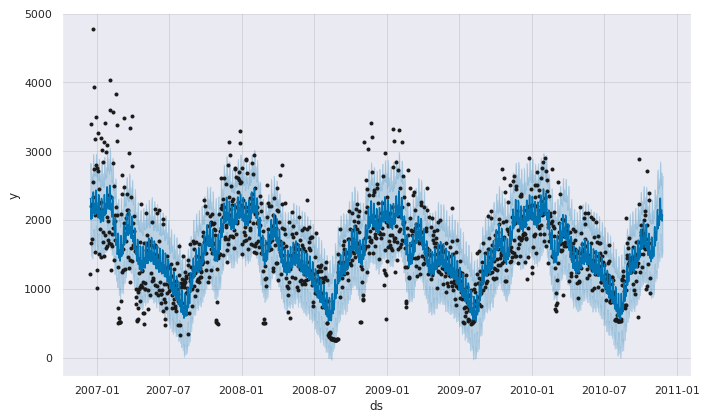

In [223]:
model.plot(forecast);

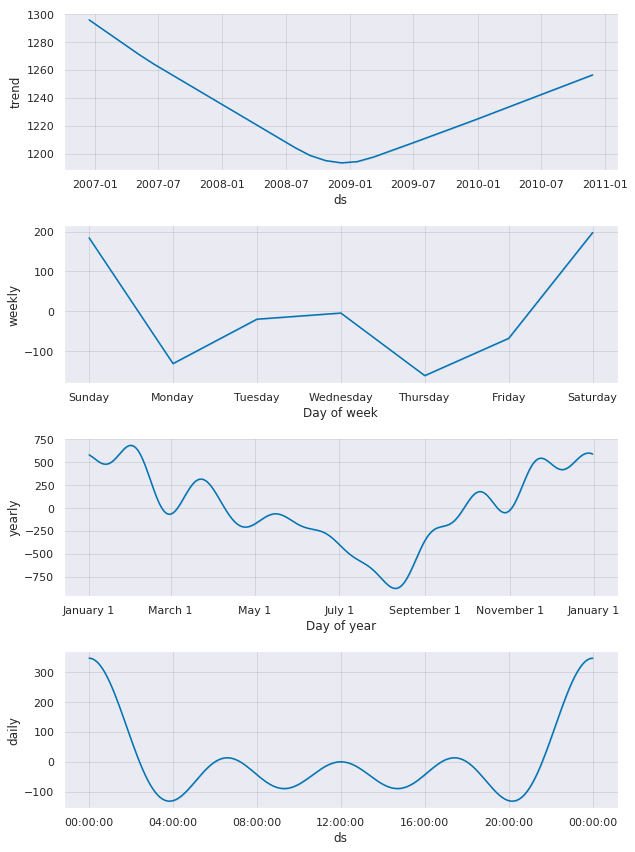

In [224]:
model.plot_components(forecast);

### Посчитаем ошибки прогноза:
MAPE (mean absolute percentage error) — это средняя абсолютная ошибка нашего прогноза. MAPE часто используется для оценки качества, поскольку эта величина относительная и по ней можно сравнивать качество даже на различных наборах данных.

$y_i$ - значение ряда в момент времени $i$.  
$\hat{y_i}$ - прогноз нашей модели в то же время.  

$e_i = y_i - \hat{y_i}$ - ошибка прогноза.  
$p_i = \frac{e_i}{y_i}$ - относительная ошибка прогноза.

$MAE = mean\space (\mid{e_i}\mid)$  
$MAPE = mean\space (\mid{p_i}\mid)$

In [225]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [226]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
       Return:
           tuple: (MAPE, MAE)
    """
    
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return error_mean('p'), error_mean('e')

In [233]:
cmp_df = make_comparison_dataframe(df, forecast)
mape, mae = calculate_forecast_errors(cmp_df, prediction_size)
print(f'MAPE = {mape},\nMAE = {mae}')

MAPE = 21.767699264027787,
MAE = 319.9011541753301


In [228]:
def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode='lines')
        args.update(kwargs)
        return go.Scatter(**args)

In [229]:
def show_forecast(cmp_df, num_predictions, num_values, title):
    """Visualize the forecast."""
    
    lower_bound = create_go('Lower Bound', 'yhat_lower', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="444"))
    upper_bound = create_go('Upper Bound', 'yhat_upper', num_predictions,
                            line=dict(width=0),
                            marker=dict(color="444"),
                            fillcolor='rgba(68, 68, 68, 0.3)', 
                            fill='tonexty')
    forecast = create_go('Forecast', 'yhat', num_predictions,
                         line=dict(color='rgb(31, 119, 180)'))
    actual = create_go('Actual', 'y', num_values,
                       marker=dict(color="red"))
    
    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title='y'), title=title, showlegend=True)
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

In [230]:
show_forecast(cmp_df, prediction_size, 100, 'Prediction')

## Преобразование Бокса-Кокса

Это монотонное преобразование для данных, которое обычно используется для стабилизации дисперсии. Подробнее [здесь.](https://en.wikipedia.org/wiki/Power_transform) 

Для исходной последовательности $y = \{ y_1, \ldots, y_n \}, \quad y_i > 0, \quad i = 1,\ldots,n$ однопараметрическое преобразование Бокса-Кокса с параметром $\lambda$ определяется следующим образом:

$y_i^{\lambda} = \begin{cases}\frac{y_i^\lambda-1}{\lambda},&\text{if } \lambda \neq 0,\\ \log{(y_i)},& \text{if } \lambda = 0.\end{cases}$

Параметр $\lambda$ можно выбирать, максимизируя логарифм правдоподобия. Еще один способ поиска оптимального значения параметра основан на поиске максимальной величины коэффициента корреляции между квантилями функции нормального распределения и отсортированной преобразованной последовательностью.

In [234]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [235]:
df_with_boxcox = df.copy().set_index('ds')
df_with_boxcox['y'], lambda_ = stats.boxcox(df_with_boxcox['y'])
df_with_boxcox.reset_index(inplace=True)

In [236]:
pd.concat([df_with_boxcox, df.y], axis=1).head()

,ds,y,y
0,2006-12-16,168.598628,1209.176
1,2006-12-17,336.676585,3390.460
2,2006-12-18,252.276815,2203.826
3,2006-12-19,209.121696,1666.194
4,2006-12-20,253.956562,2225.748


In [237]:
train_df_wb = df_with_boxcox[:-prediction_size]

model_wb = Prophet(daily_seasonality=True)
model_wb.fit(train_df_wb)

/home/quantum/anaconda3/envs/workshop/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



In [238]:
future_df_wb = model_wb.make_future_dataframe(periods=prediction_size, freq='D')
future_df_wb.tail()

,ds
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25
1441,2010-11-26


In [239]:
forecast_wb = model_wb.predict(future_df_wb)
forecast_wb.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1437,2010-11-22,174.650488,192.314251,285.176174,174.641407,174.659120,63.445583,63.445583,63.445583,27.024764,...,-10.676995,-10.676995,-10.676995,47.097814,47.097814,47.097814,0.0,0.0,0.0,238.096071
1438,2010-11-23,174.660136,199.860287,292.432161,174.650287,174.669497,73.338574,73.338574,73.338574,27.024764,...,-1.315032,-1.315032,-1.315032,47.628842,47.628842,47.628842,0.0,0.0,0.0,247.998710
1439,2010-11-24,174.669783,204.278519,297.393169,174.658943,174.680312,74.976195,74.976195,74.976195,27.024764,...,0.106383,0.106383,0.106383,47.845048,47.845048,47.845048,0.0,0.0,0.0,249.645979
1440,2010-11-25,174.679431,190.068731,285.529869,174.667812,174.690736,61.412692,61.412692,61.412692,27.024764,...,-13.378964,-13.378964,-13.378964,47.766892,47.766892,47.766892,0.0,0.0,0.0,236.092123
1441,2010-11-26,174.689079,194.901431,290.968622,174.676678,174.701103,69.475486,69.475486,69.475486,27.024764,...,-4.970501,-4.970501,-4.970501,47.421223,47.421223,47.421223,0.0,0.0,0.0,244.164565


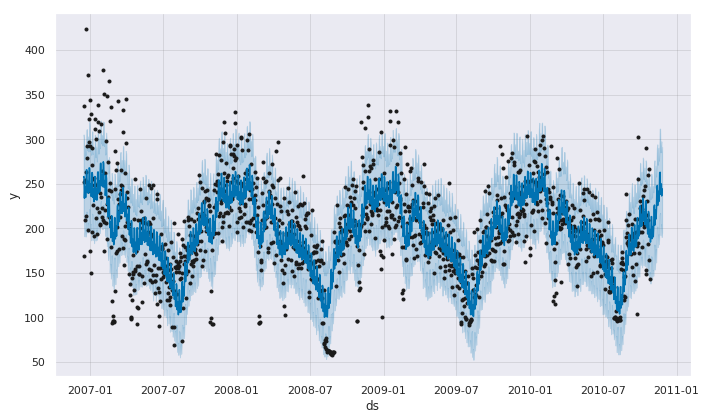

In [240]:
model_wb.plot(forecast_wb);

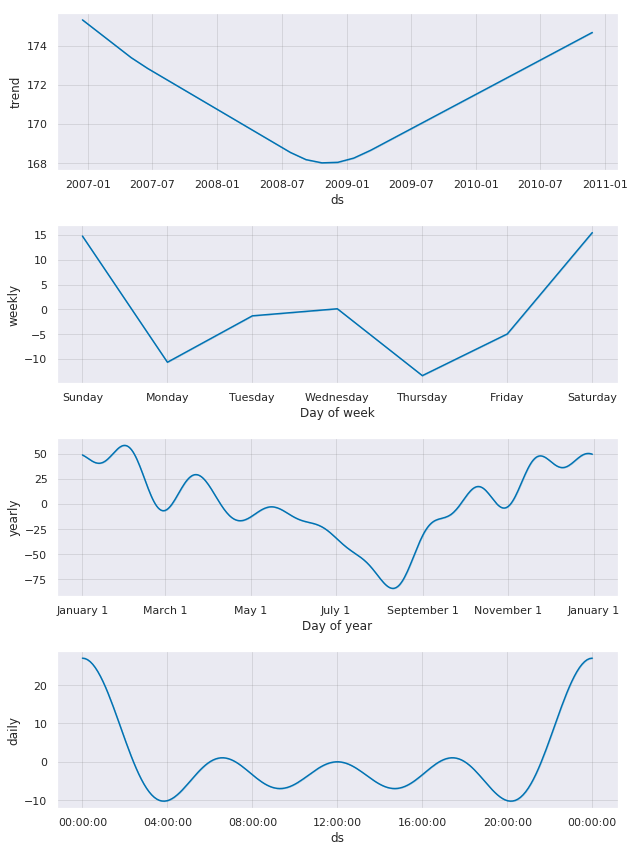

In [241]:
model_wb.plot_components(forecast_wb);

In [258]:
cmp_df_wb = make_comparison_dataframe(df_with_boxcox, forecast_wb)
mape_wb, mae_wb = calculate_forecast_errors(cmp_df_wb, prediction_size)
print(f'MAPE = {mape:.2f}, MAPE with Box-Cox = {mape_wb:.2f}')
print(f'MAE = {mae:.2f}, MAE with Box-Cox = {mae_wb:.2f}')

MAPE = 21.77, MAPE with Box-Cox = 13.91
MAE = 319.90, MAE with Box-Cox = 26.90


In [256]:
show_forecast(cmp_df, prediction_size, 140, f'Prediction without transformation (MAPE = {mape:.2f})')
show_forecast(cmp_df_wb, prediction_size, 140, f'Prediction after Box-Cox (MAPE = {mape_wb:2f})')